# brmspy - google colab

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1uq6S3exG1zy-JX1lD69ehG4ZHOu9eXY6)

In [1]:
import sys, os # for running from repo
sys.path.insert(0, os.path.abspath("../../"))

try: from brmspy import brms
except ImportError:
    %pip install -q brmspy
    from brmspy import brms

[brmspy][_call_with_frames_removed] Running autoload!
[brmspy][_autoload] Activating runtime /Users/sebastian/.brmspy/runtime/macos-arm64-r4.5-0.2.0
[brmspy][_autoload] lib paths are ['/Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/library', '/Users/sebastian/.brmspy/runtime/macos-arm64-r4.5-0.2.0/Rlib']
[brmspy][_autoload] Setting cmdstan path to /Users/sebastian/.brmspy/runtime/macos-arm64-r4.5-0.2.0/cmdstan


In [2]:
with brms.manage() as ctx:
    ctx.install_brms(use_prebuilt=True)

[brmspy][install_brms] Activating runtime /Users/sebastian/.brmspy/runtime/macos-arm64-r4.5-0.2.0
[brmspy][install_brms] lib paths are ['/Users/sebastian/.brmspy/environment/default/Rlib', '/Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/library', '/Users/sebastian/.brmspy/runtime/macos-arm64-r4.5-0.2.0/Rlib']
[brmspy][install_brms] Setting cmdstan path to /Users/sebastian/.brmspy/runtime/macos-arm64-r4.5-0.2.0/cmdstan


In [ ]:
epilepsy = brms.get_brms_data("epilepsy")
formula = "count ~ zAge + zBase * Trt + (1|patient)"
family = "poisson"
brms.default_prior(formula, data=epilepsy, family=family)

,prior,class,coef,group,resp,dpar,nlpar,lb,ub,tag,source
1,,b,,,,,,,,,default
2,,b,Trt,,,,,,,,default
3,,b,zAge,,,,,,,,default
4,,b,zBase,,,,,,,,default
5,,b,zBase:Trt,,,,,,,,default
6,"student_t(3, 1.4, 2.5)",Intercept,,,,,,,,,default
7,"student_t(3, 0, 2.5)",sd,,,,,,0,,,default
8,,sd,,patient,,,,,,,default
9,,sd,Intercept,patient,,,,,,,default


In [ ]:
model = brms.brm(
    formula=formula,
    data=epilepsy,
    family=family,
    warmup=500,
    iter=1000,
    chains=4
)
idata = model.idata

[brmspy][worker_main] Fitting model with brms (backend: cmdstanr)...
Running MCMC with 4 chains, at most 2 in parallel...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 2 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
C

Inference data with groups:
	> posterior
	> posterior_predictive
	> log_likelihood
	> observed_data

In [9]:
brms.save_rds(model, "epilepsy_fixed_effects.rds")
# load later using: model = brms.load_rds_fit("epilepsy_fixed_effects.rds")

In [12]:
epilepsy

,Age,Base,Trt,patient,visit,count,obs,zAge,zBase
obs0,31.0,11.0,1,1,1,5.0,1,0.424995,-0.757173
obs1,30.0,11.0,1,2,1,3.0,2,0.265284,-0.757173
obs2,25.0,6.0,1,3,1,2.0,3,-0.533274,-0.944403
obs3,36.0,8.0,1,4,1,4.0,4,1.223553,-0.869511
obs4,22.0,66.0,1,5,1,7.0,5,-1.012408,1.302363
...,...,...,...,...,...,...,...,...,...
obs231,32.0,16.0,2,55,4,3.0,232,0.584707,-0.569942
obs232,26.0,22.0,2,56,4,8.0,233,-0.373562,-0.345266
obs233,21.0,25.0,2,57,4,1.0,234,-1.172120,-0.232927
obs234,36.0,13.0,2,58,4,0.0,235,1.223553,-0.682281


In [14]:
c = brms.call("as.data.frame", epilepsy)
c

,Age,Base,Trt,patient,visit,count,obs,zAge,zBase
obs0,31.0,11.0,1,1,1,5.0,1,0.424995,-0.757173
obs1,30.0,11.0,1,2,1,3.0,2,0.265284,-0.757173
obs2,25.0,6.0,1,3,1,2.0,3,-0.533274,-0.944403
obs3,36.0,8.0,1,4,1,4.0,4,1.223553,-0.869511
obs4,22.0,66.0,1,5,1,7.0,5,-1.012408,1.302363
...,...,...,...,...,...,...,...,...,...
obs231,32.0,16.0,2,55,4,3.0,232,0.584707,-0.569942
obs232,26.0,22.0,2,56,4,8.0,233,-0.373562,-0.345266
obs233,21.0,25.0,2,57,4,1.0,234,-1.172120,-0.232927
obs234,36.0,13.0,2,58,4,0.0,235,1.223553,-0.682281


In [10]:
import arviz as az
summary = az.summary(
    idata,
    hdi_prob=0.95,
    kind="stats",
    round_to=3
)

print("Posterior Summary")
print("="*60)
print(summary)

Posterior Summary
                            mean     sd  hdi_2.5%  hdi_97.5%
b_Intercept                1.999  0.254     1.481      2.471
b_zAge                     0.093  0.082    -0.073      0.256
b_zBase                    0.638  0.291     0.170      1.254
b_Trt                     -0.249  0.160    -0.554      0.033
b_zBase:Trt                0.057  0.191    -0.310      0.442
...                          ...    ...       ...        ...
r_patient[57,Intercept]   -0.611  0.319    -1.183     -0.055
r_patient[58,Intercept]   -1.274  0.387    -1.952     -0.456
r_patient[59,Intercept]   -0.134  0.282    -0.660      0.355
lprior                    -3.184  0.009    -3.201     -3.168
lp__                    -700.023  7.204  -713.473   -687.602

[68 rows x 4 columns]


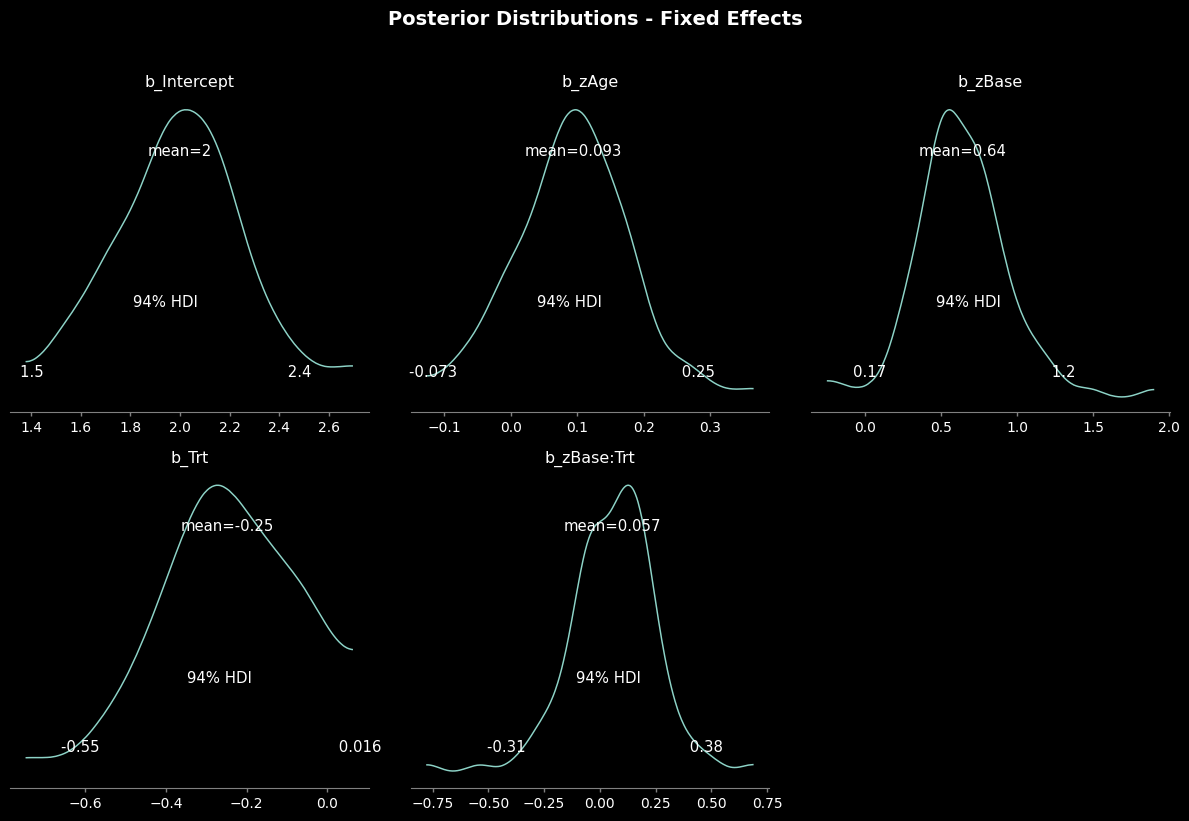

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = az.plot_posterior(
    idata,
    var_names=['b_Intercept', 'b_zAge', 'b_zBase', 'b_Trt', 'b_zBase:Trt'],
    figsize=(12, 8),
    textsize=10
)
plt.suptitle('Posterior Distributions - Fixed Effects', y=1.02, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()
